In [1]:
include("src/CrossSection.jl")
using .CrossSection

In [2]:
using Plots
using LaTeXStrings
using RecipesBase

In [3]:
include("src/plotrecipes.jl")
include("src/data.jl")

read_coherent_data (generic function with 1 method)

---
#### Photon vector meson wavefunction overlap
The expressions are taken from [arXiv:hep-ph/0606272](https://arxiv.org/abs/hep-ph/0606272)
$$\begin{aligned}(\Psi^*_V\Psi)_T&=\hat{e}_f e\dfrac{N_c}{\pi z(1-z)}\left\{m_f^2 K_0(\epsilon r)\phi_T(r,z)-[z^2+(1-z)^2]\epsilon K_1(\epsilon r)\partial_r \phi_T(r,z)\right\}\\
(\Psi^*_V\Psi)_L&=\hat{e}_f e\dfrac{N_c}{\pi}2Qz(1-z)K_0(\epsilon r)\left[M_V\phi_L(r,z)+\delta \dfrac{m_f^2-\nabla_r^2}{M_vz(1-z)}\phi_L(r,z)\right]
\end{aligned}$$

##### Boosted Gaussian model
$$\phi_{T,L}(r,z)=\mathcal{N}_{T,L}z(1-z)\exp\left(-\dfrac{m_f^2\mathcal{R}^2}{8z(1-z)}-\dfrac{2z(1-z)r^2}{\mathcal{R}^2}+\dfrac{m_f^2\mathcal{R}^2}{2}\right)$$

The parameters $\mathcal{N}_{T,L}$ and $\mathcal{R}$ are determined from the normalization and decay width conditions. 

In [3]:
ϕ(r, z, "T", params_wavefct)

0.578z*(1 - z)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z))

In [4]:
ϕ(r, z, "L", params_wavefct)

0.575z*(1 - z)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z))

In [5]:
ΨᵥΨ(r, z, "T", params_wavefct)

(0.5784236293296671(1.1328799999999997z*(1 - z)*SpecialFunctions.besselk(0, 1.4r)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z)) - 1.407304347826087r*(z^2)*(-(z^2) - ((1 - z)^2))*((1 - z)^2)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z))*SpecialFunctions.besselk(1, 1.4r))) / (z*(1 - z))

In [6]:
ΨᵥΨ(r, z, "L", params_wavefct)

0.0

---

#### GBW dipole cross section

$$\sigma_{q\overline{q}}^\mathrm{GBW}(x,r)=\sigma_0 \left(1-\mathrm{e}^{-r^2 Q_s^2(x)/4}\right)$$

where $Q_s^2(x)=(x_0/x)^{\lambda_{\mathrm{GBW}}}$.

Let us introduce an impact parameter dependence 

$$\dfrac{\mathrm{d}\sigma_{q\overline{q}}}{\mathrm{d}^2\boldsymbol{b}}=\sigma_0\left(1-\mathrm{e}^{-\mathcal{N}r^2 Q_s^2(x,b)}\right)$$

where $Q_s^2(x,b)=(x_0/x)^{\lambda_{\mathrm{GBW}}}T(b)$ with a Gaussian thickness function

$$T(b)=\dfrac{1}{2\pi B_p}\mathrm{e}^{-\frac{b^2}{2B_p}}$$

Here the parameter $B_p$ is the proton width. Here $\mathcal{N}$ is a normalization factor chosen to fit $\mathrm{d}\sigma/\mathrm{d}t$.

In [7]:
Qₛ(params_gbw)

0.5915964371087449

In [8]:
T(b, params_gbw)

0.039788735772973836exp((-1//8)*(b^2))

In [9]:
gbwdipole(r, b, params_gbw)

74.47751(1 - exp(-0.17406892726838896(r^2)*exp((-1//8)*(b^2))))

---
#### Coherent cross section
Coherent diffraction cross section

$$\dfrac{\mathrm{d}\sigma^{\gamma^*p\rightarrow Vp}_\mathrm{c}}{\mathrm{d}t}=\dfrac{1}{16\pi}\left|\langle\mathcal{A}_{T,L}^{\gamma^*p\rightarrow Vp}(x_{\mathbb{P}}, Q^2, \boldsymbol{\Delta})\rangle\right|^2$$

Assuming angle independence of the cross section and wavefunctions, the scattering amplitude simplifies to

$$\begin{aligned}\mathcal{A}_{T,L}^{\gamma^*p\rightarrow Vp}(x_{\mathbb{P}}, Q^2, \boldsymbol{\Delta})=&\mathrm{i}\pi\int\limits_{r_\mathrm{min}}^{r_\mathrm{max}} r\,\mathrm{d} r\int_{b_\mathrm{min}}^{b_\mathrm{max}} b \,\mathrm{d} b \int_0^1\mathrm{d}z\, (\Psi^*\Psi_V)_{T,L}(Q^2, r,z)\\ &\times \dfrac{\mathrm{d}\sigma^p_{\mathrm{dip}}}{\mathrm{d}^2 \boldsymbol{b}}(b, r, x_{\mathbb{P}})J_0(b\Delta)J_0((1-z)r\Delta)\end{aligned}$$
where we used $\int_0^{2\pi}d\theta e^{-i a \cos\theta}=2\pi J_0(a)$, with $J_0$ the Bessel function of first kind.

In [10]:
Agbw(r, b, z, Δ, params_wavefct, params_gbw)

(43.07955163763657b*r*(1.1328799999999997z*(1 - z)*SpecialFunctions.besselk(0, 1.4r)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z)) - 1.407304347826087r*(z^2)*(-(z^2) - ((1 - z)^2))*((1 - z)^2)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z))*SpecialFunctions.besselk(1, 1.4r))*SpecialFunctions.besselj(0, b*Δ)*SpecialFunctions.besselj(0, r*(1 - z)*Δ)*(1 - exp(-0.17406892726838896(r^2)*exp((-1//8)*(b^2))))) / (z*(1 - z))

In [5]:
t_range, dσdt, dσdt_err = diffractive("coh", "GWB", params_wavefct, params_gbw, params_cq, params_mc)

Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 7.38 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 7.74 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 7.93 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 8.22 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 8.59 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 8.35 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 8.41 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 8.51 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 8.53 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 8.48 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 8.38 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 8.69 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 9.21 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 8.75

([0.0, 0.00510204081632653, 0.02040816326530612, 0.04591836734693877, 0.08163265306122448, 0.12755102040816327, 0.18367346938775508, 0.25, 0.32653061224489793, 0.41326530612244905, 0.5102040816326531, 0.6173469387755102, 0.7346938775510203, 0.8622448979591837, 1.0], [273.8586905245535, 271.54255237139444, 252.48798757105354, 224.80950234360975, 189.08201305864435, 153.44803032025317, 115.65450800229429, 85.51343835703558, 60.61333094379446, 39.39693046737283, 24.67498884522479, 15.434747999043227, 8.830459638583196, 4.413062515292719, 2.381549179019968], [3.0159533534337517, 2.7149997003245994, 2.7081798322502237, 2.4839322539171063, 2.181181446831332, 1.60116984715529, 1.2266920997560231, 1.0050682688914803, 0.7521630695868529, 0.4700375330836651, 0.3642660137932835, 0.21441782935074113, 0.18366609084668098, 0.12620881415090604, 0.08519139662924895])

---
#### Plot coherent cross section in GBW model

In [14]:
tcent_hera, dσcoh_hera, Δtot_hera = read_coherent_data("jpsi_coh_hera.txt")

([0.02, 0.08, 0.14, 0.21, 0.3, 0.41, 0.58, 0.9], [336.0, 240.5, 161.2, 111.4, 70.4, 41.2, 18.0, 4.83], [18.0, 12.9, 9.3, 7.0, 5.1, 3.7, 2.7, 1.75])

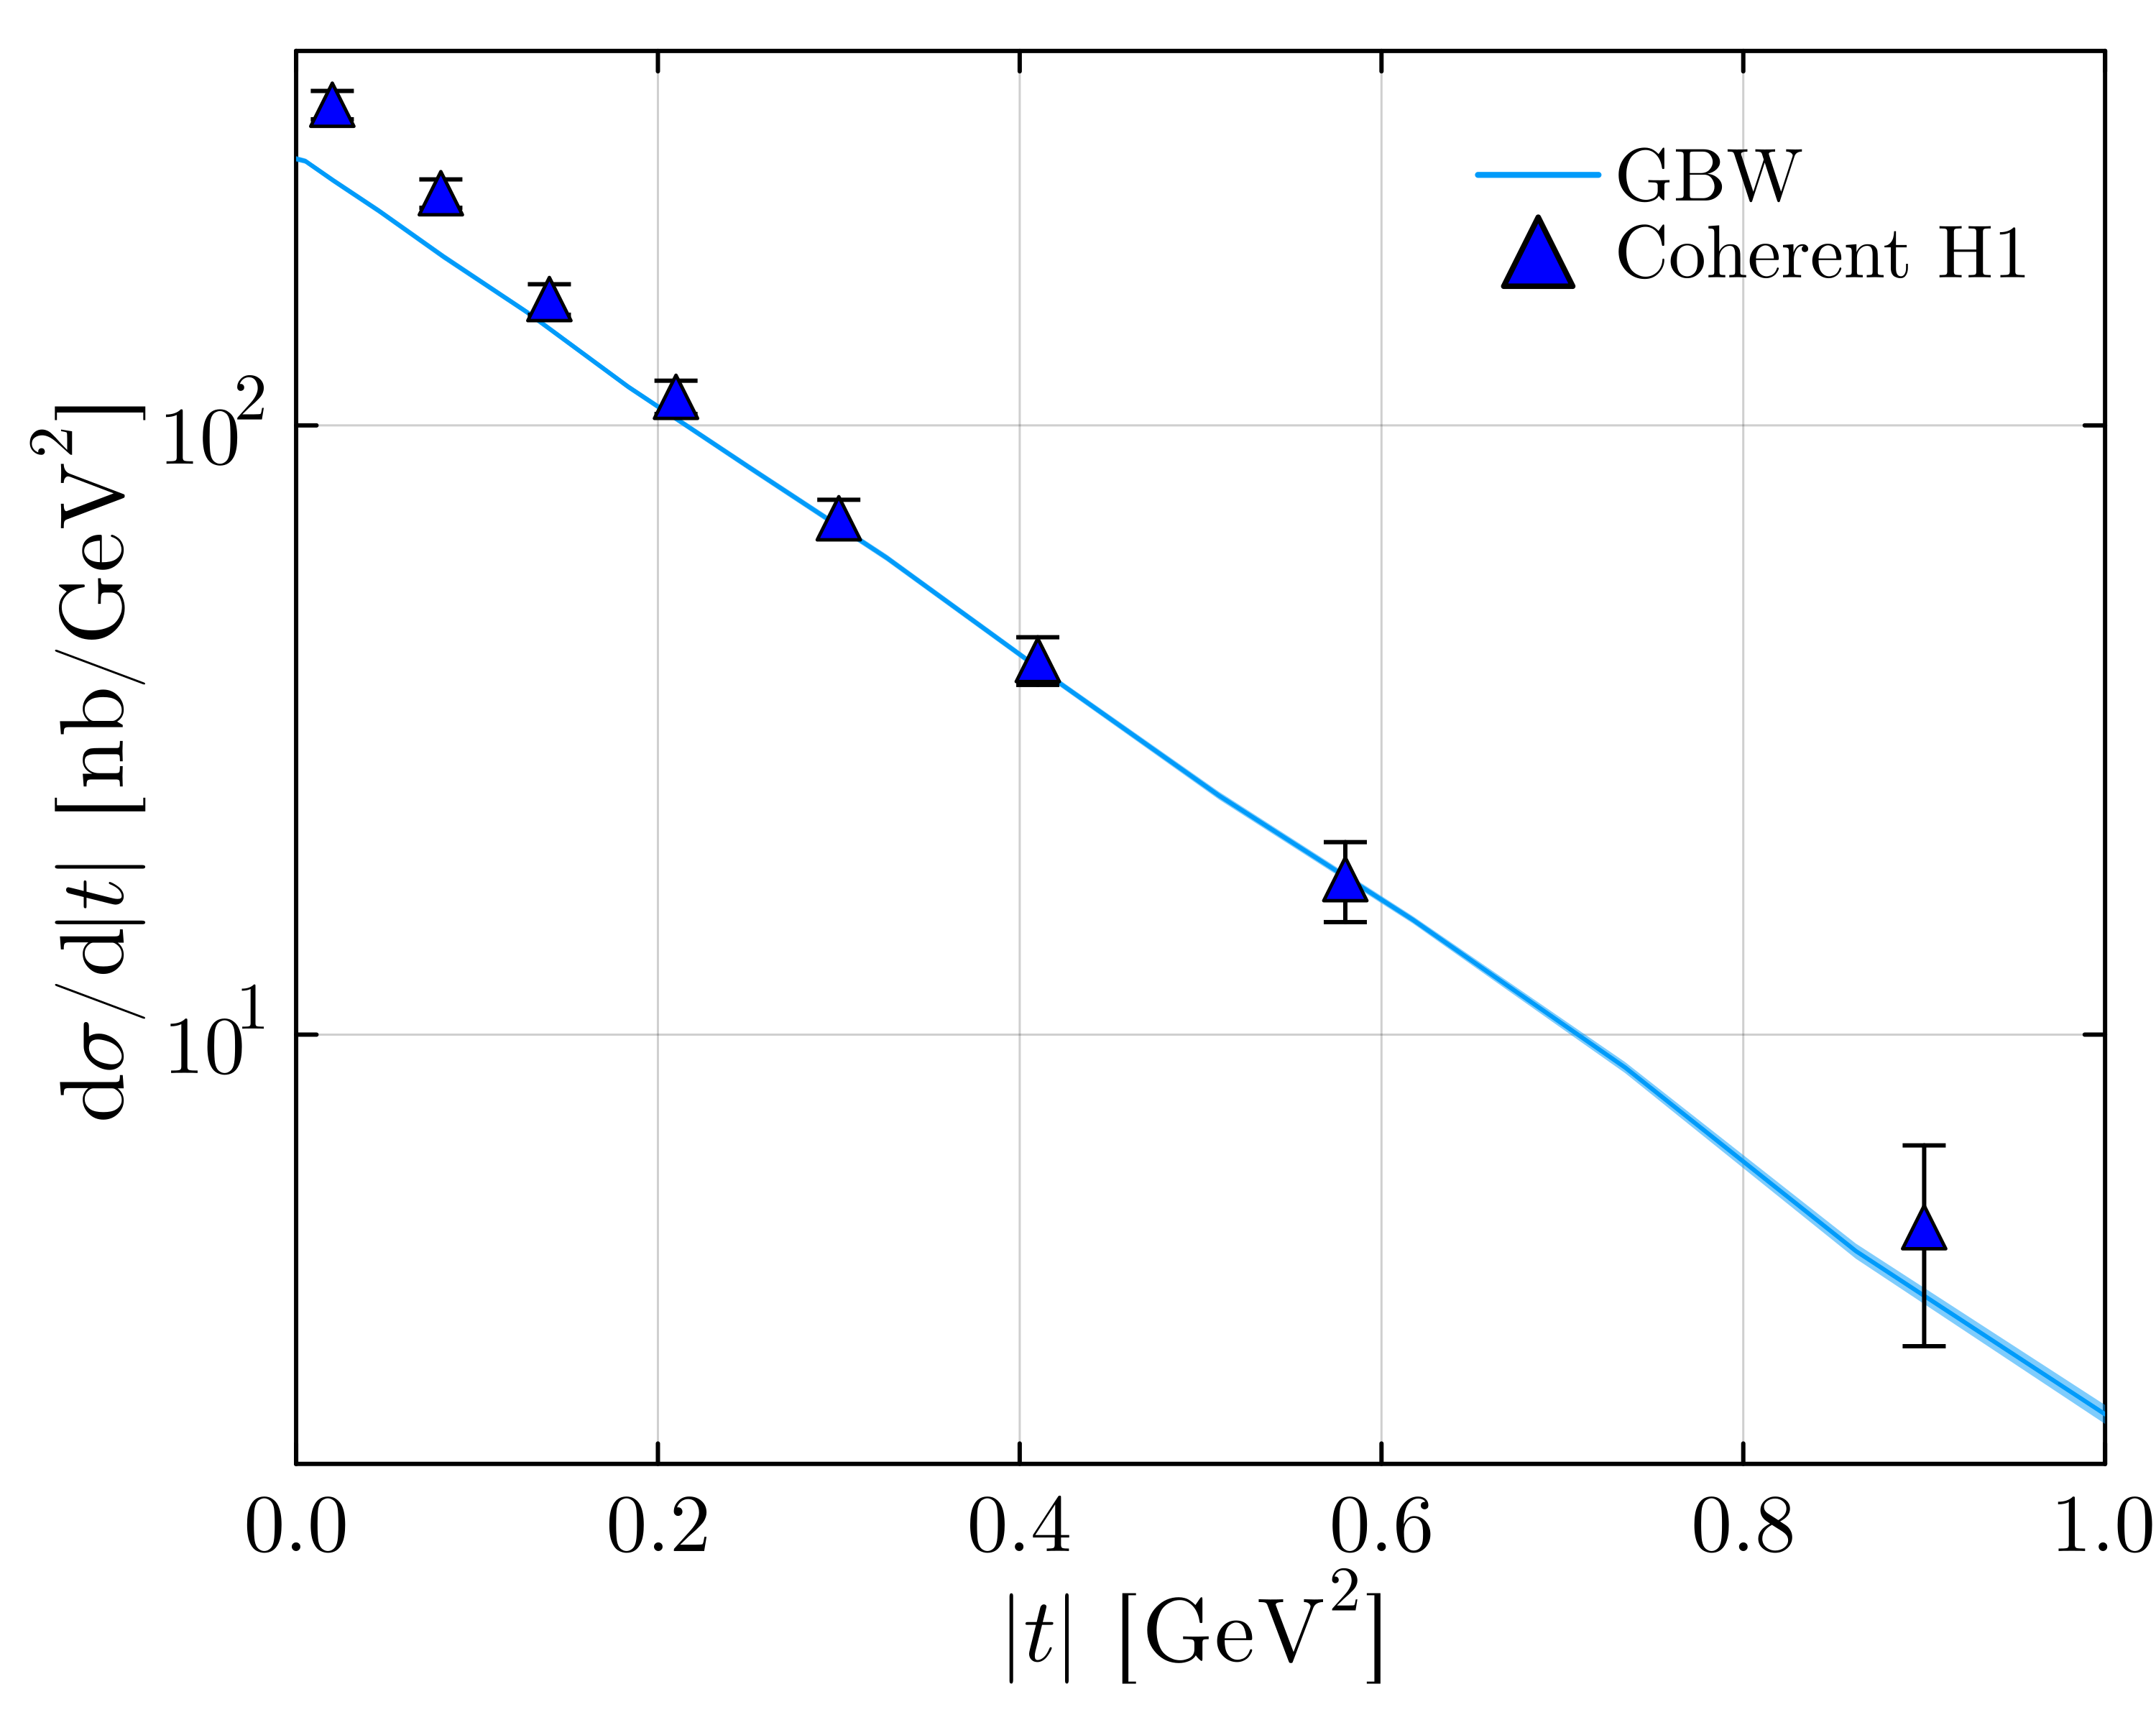

In [15]:
data = CoherentMCData(t_range, dσdt, dσdt_err, tcent_hera, dσcoh_hera, Δtot_hera)
plot(data)

---
#### Constituent quark model
Quark positions $\vec{b}_i$ sampled from a Gaussian distribution with width $B_{qc}$, with $i\in\overline{1, N_q}$ where $N_q$ is the number of constituent quarks.

Density for each quark $\displaystyle T_q(\vec{b})=\dfrac{1}{2\pi B_q}\mathrm{e}^{-\vec{b}^2/(2 B_q)}$. Total proton density $\displaystyle T_p(\vec{b})=\dfrac{1}{N_q}\sum_{i}^{1,N_q}T_q(\vec{b}-\vec{b}_i)$.

In [3]:
test_bqc = sample_bqc(params_cq)

3-element Vector{Tuple{Float64, Float64}}:
 (-2.52111629487142, -0.35262879156714444)
 (0.5314086341837558, 1.3252248188292477)
 (2.083771955872631, 0.1860893758006681)

In [4]:
test_b, test_θb = 1.0, π / 4
Tp(test_b, test_θb, test_bqc, params_cq)

0.07339562280153862

In [16]:
grid_min = -5.0
grid_max = 5.0
n_grid = 200
bx_vals = range(grid_min, grid_max, length=n_grid)
by_vals = range(grid_min, grid_max, length=n_grid)

-5.0:0.05025125628140704:5.0

In [18]:
Tp_vals = compute_Tp_grid(bx_vals, by_vals, sample_bqc(params_cq), params_cq)

200×200 Matrix{Float64}:
 3.78616e-21  6.15111e-21  9.97772e-21  …  4.71537e-19  2.92857e-19
 6.0153e-21   9.73649e-21  1.57382e-20     7.18148e-19  4.4602e-19
 9.54594e-21  1.53913e-20  2.47867e-20     1.08823e-18  6.75865e-19
 1.5134e-20   2.43025e-20  3.89857e-20     1.64071e-18  1.01899e-18
 2.39727e-20  3.83354e-20  6.12487e-20     2.46121e-18  1.52859e-18
 3.79451e-20  6.04199e-20  9.61304e-20  …  3.67345e-18  2.28147e-18
 6.00201e-20  9.51555e-20  1.50749e-19     5.45514e-18  3.38802e-18
 9.4875e-20   1.49758e-19  2.36224e-19     8.06017e-18  5.00593e-18
 1.49871e-19  2.35538e-19  3.6991e-19      1.18492e-17  7.35918e-18
 2.36576e-19  3.70204e-19  5.78872e-19     1.73317e-17  1.07642e-17
 ⋮                                      ⋱               
 1.44529e-15  2.13835e-15  3.14788e-15     1.39316e-7   9.64061e-8
 9.58007e-16  1.41745e-15  2.08672e-15     1.31441e-7   9.0957e-8
 6.31847e-16  9.34908e-16  1.37642e-15     1.23387e-7   8.53835e-8
 4.14659e-16  6.13587e-16  9.03425e-16 

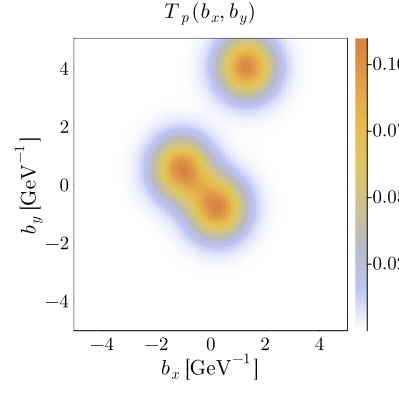

In [19]:
default(fontfamily="Computer Modern", framestyle=:box, labelfontsize=14, tickfontsize=12, size=(400,400))
	
heatmap(bx_vals, by_vals, Tp_vals, xlabel=L"b_x\,\,\mathrm{[GeV^{-1}]}", ylabel=L"b_y\,\,\mathrm{[GeV^{-1}]}", title=L"T_p\,(b_x, b_y)", color=reverse(cgrad(:beach)), colorbar=:true)

---
#### Scattering amplitude for constituent quark model

The scattering amplitude simplifies to

$$\begin{aligned}\mathcal{A}_{T,L}^{\gamma^*p\rightarrow Vp}(x_{\mathbb{P}}, Q^2, \boldsymbol{\Delta})=&\frac{\mathrm{i}}{2}\int\limits_{r_\mathrm{min}}^{r_\mathrm{max}} r\,\mathrm{d} r\int_{b_\mathrm{min}}^{b_\mathrm{max}} b \,\mathrm{d} b \int_{0}^{2\pi} \mathrm{d} \theta_b \int_0^1\mathrm{d}z\, (\Psi^*\Psi_V)_{T,L}(Q^2, r,z)\\ &\times \dfrac{\mathrm{d}\sigma^p_{\mathrm{dip}}}{\mathrm{d}^2 \boldsymbol{b}}(r, b, \theta_b, x_{\mathbb{P}})\mathrm{e}^{-\mathrm{i}b\Delta\cos\theta_b}J_0((1-z)r\Delta)\end{aligned}$$
where we used $\int_0^{2\pi}d\theta e^{-i a \cos\theta}=2\pi J_0(a)$, with $J_0$ the Bessel function of first kind.

In [4]:
Aqc(r, b, θb, test_bqc, z, Δ, Tp, params_wavefct, params_gbw, params_cq, "real")

(43.07955163763657b*r*(1.1328799999999997z*(1 - z)*SpecialFunctions.besselk(0, 1.4r)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z)) - 1.407304347826087r*(z^2)*(-(z^2) - ((1 - z)^2))*((1 - z)^2)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z))*SpecialFunctions.besselk(1, 1.4r))*(1 - exp(-1.4582764349990047(r^2)*(0.3183098861837907exp(-((0.35262879156714444 + b*sin(θb))^2) - ((2.52111629487142 + b*cos(θb))^2)) + 0.3183098861837907exp(-((-0.1860893758006681 + b*sin(θb))^2) - ((-2.083771955872631 + b*cos(θb))^2)) + 0.3183098861837907exp(-((-1.3252248188292477 + b*sin(θb))^2) - ((-0.5314086341837558 + b*cos(θb))^2)))))*cos(-b*cos(θb)*Δ)*SpecialFunctions.besselj(0, r*(1 - z)*Δ)) / (z*(1 - z))

In [4]:
t_range, dσdt, dσdt_err = diffractive("coh", "CQ", params_wavefct, params_gbw, params_cq, params_mc; run_threads=true)

Total iterations * blocks 160: 100%|██████| Time: 0:00:03 (20.87 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 (10.02 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 (10.24 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 9.66 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 (10.22 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 9.61 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 9.96 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 9.56 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 (10.46 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 9.63 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 (10.05 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 9.72 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 (10.21 ms/it)
Total iterations * blocks 160: 100%|██████| Time: 0:00:01 ( 9.81

([0.0, 0.00510204081632653, 0.02040816326530612, 0.04591836734693877, 0.08163265306122448, 0.12755102040816327, 0.18367346938775508, 0.25, 0.32653061224489793, 0.41326530612244905, 0.5102040816326531, 0.6173469387755102, 0.7346938775510203, 0.8622448979591837, 1.0], [382.7011322034518, 351.07814180330007, 299.64159255554705, 224.24899352763788, 195.1503494599586, 144.34050418590147, 113.18916346376207, 102.60809090690492, 33.77075222742659, 26.20335319876328, 4.022936100092573, 6.367673870708007, 3.9231553138928423, 0.08767652698770069, 0.39988059829635336], [0.05455963840284617, 0.2037383811106883, 0.5058283687373043, 0.6146609426445386, 0.7233033117622536, 0.7145301814238716, 0.5207038182347348, 0.5552861456178292, 0.36036436824279, 0.37714538604695874, 0.10826480829306061, 0.16185772995083453, 0.13645022509467492, 0.0185914293709193, 0.0367347792970919])

In [5]:
tcent_hera, dσcoh_hera, Δtot_hera = read_coherent_data("jpsi_coh_hera.txt")

([0.02, 0.08, 0.14, 0.21, 0.3, 0.41, 0.58, 0.9], [336.0, 240.5, 161.2, 111.4, 70.4, 41.2, 18.0, 4.83], [18.0, 12.9, 9.3, 7.0, 5.1, 3.7, 2.7, 1.75])

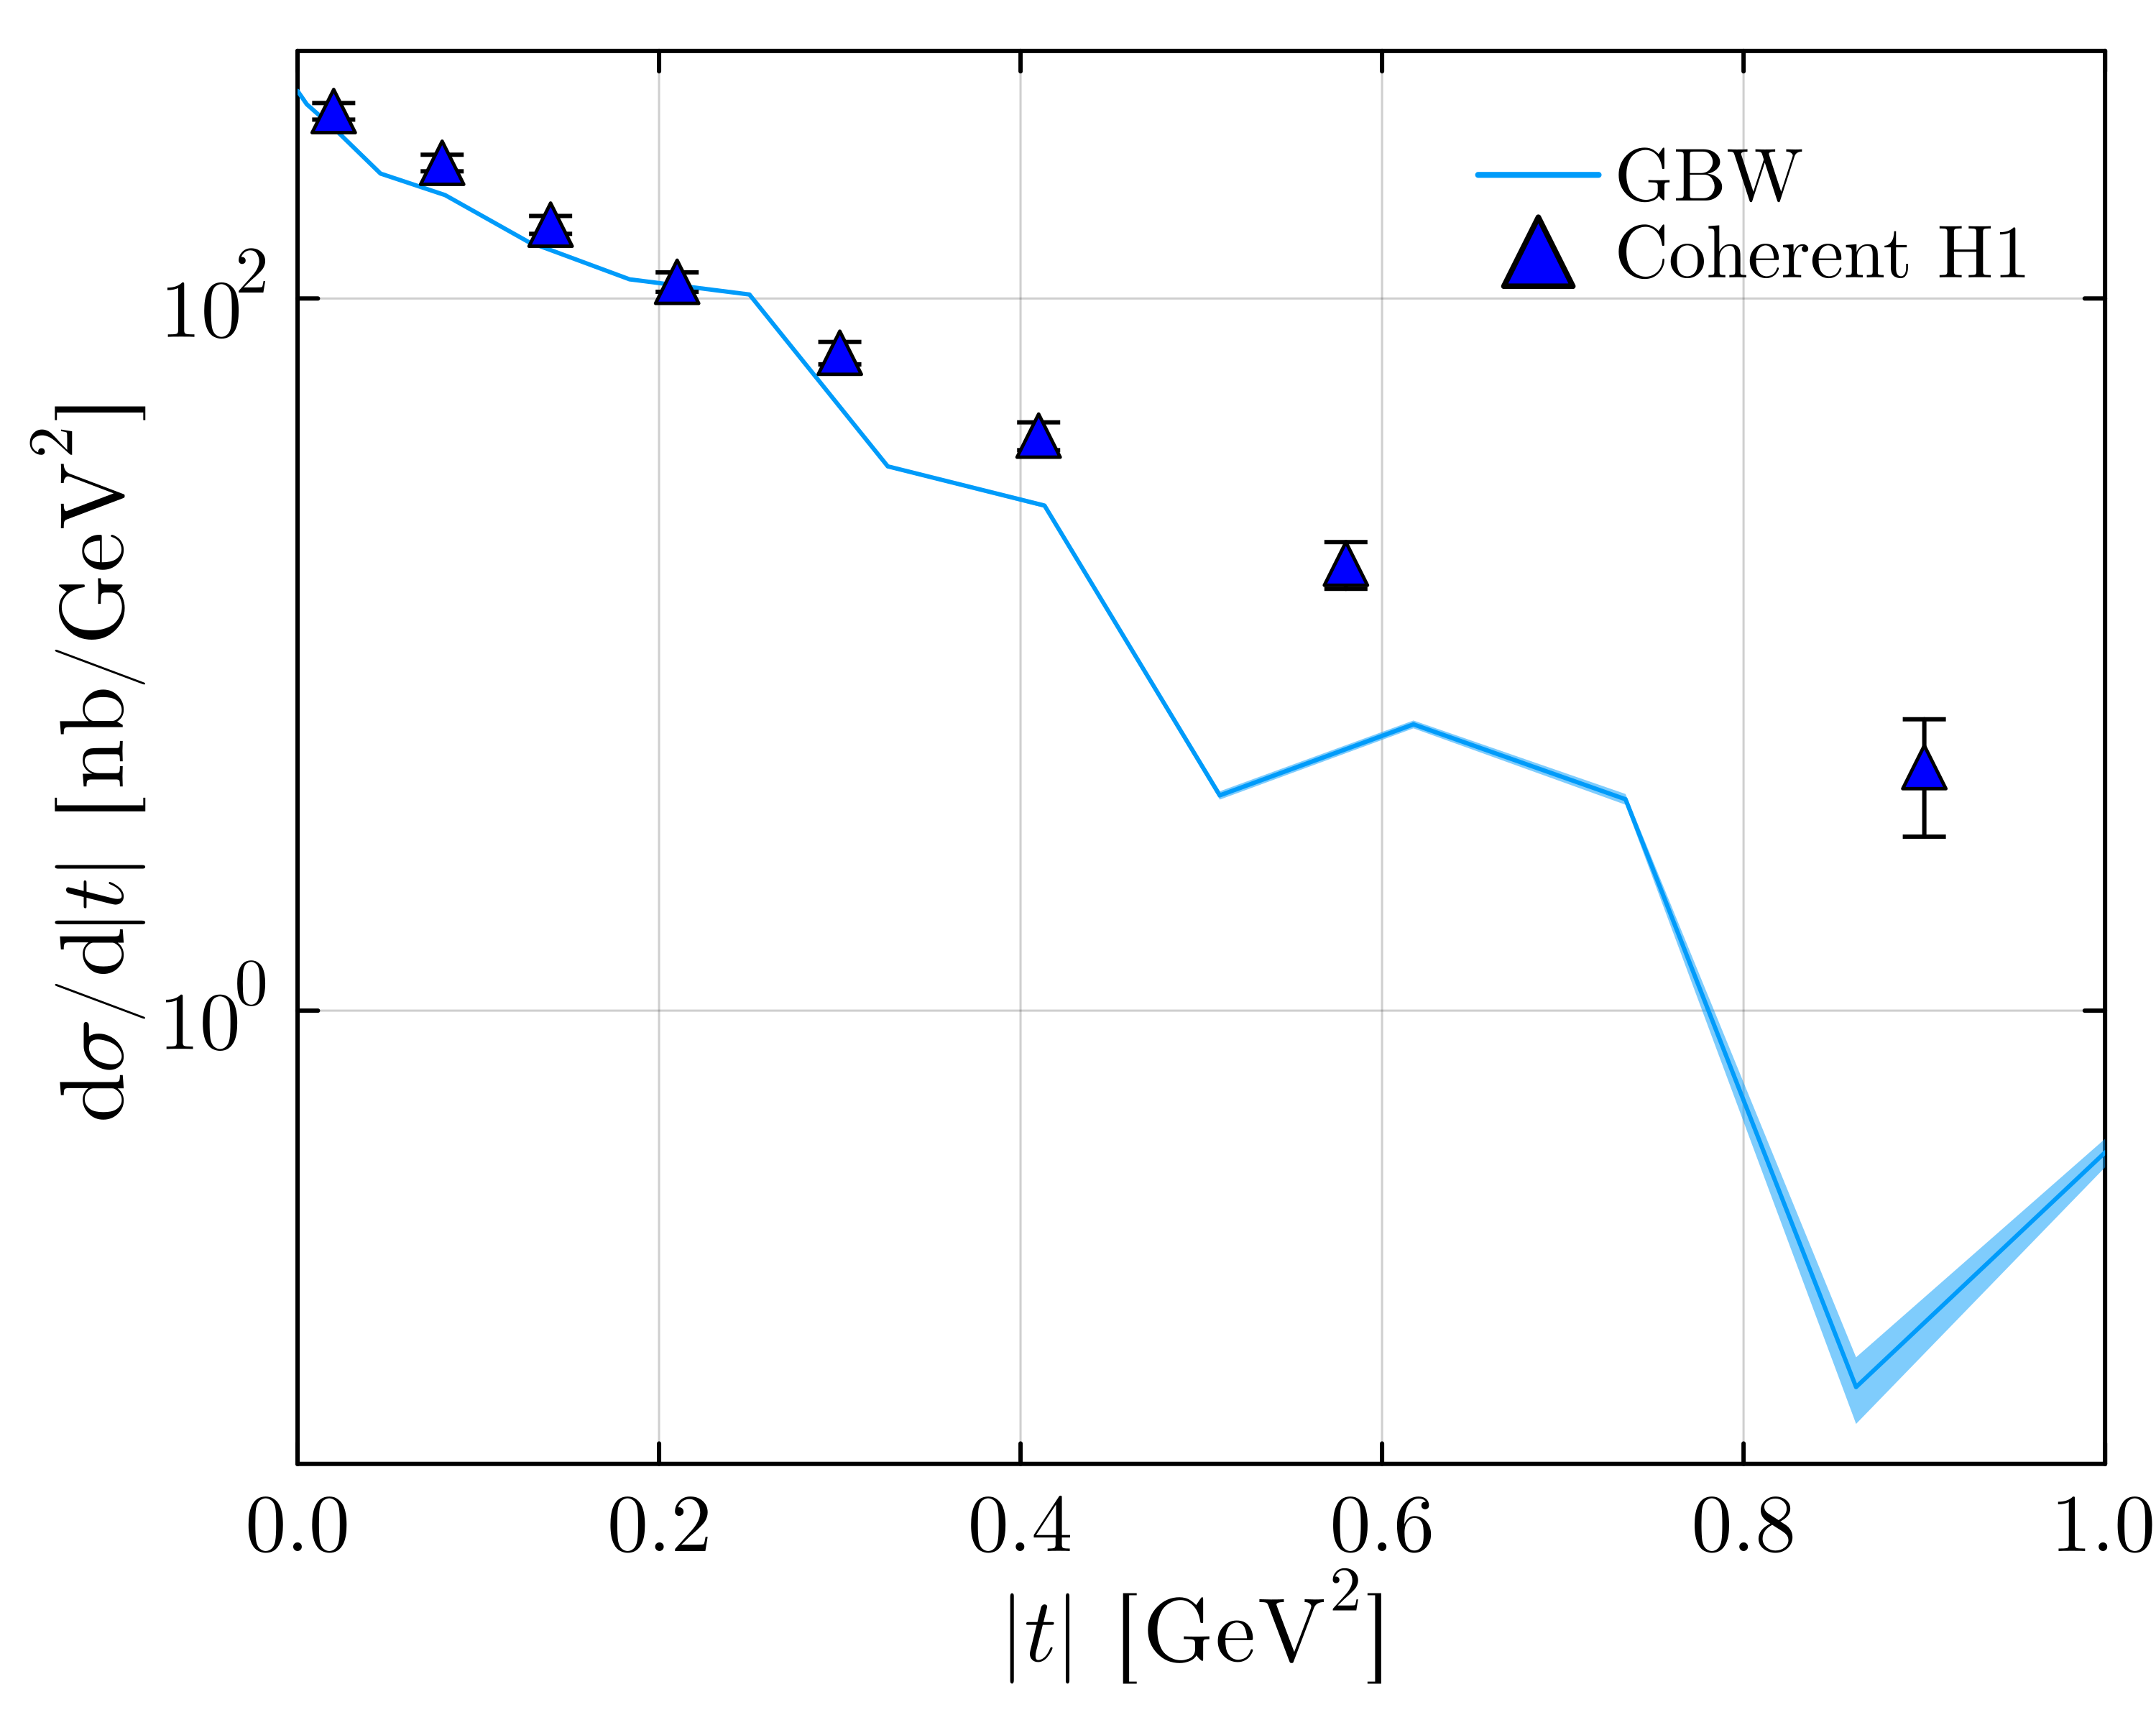

In [6]:
data = CoherentMCData(t_range, dσdt, dσdt_err, tcent_hera, dσcoh_hera, Δtot_hera)
display(plot(data))